HillClimbMABCallback : A hybrid MAB controller that combines stable hill-climbing with global exploration.

Initial Metrics:
Mean SND: -0.01
Mean Reward: 1.64
Correlation Score: 0.09
Initial Cohesion: 1.39

Target Metrics:
New Target Diversity (SND): 0.02
Filtered Cluster Cohesion: 0.72
Combined Performance Score: 2.51


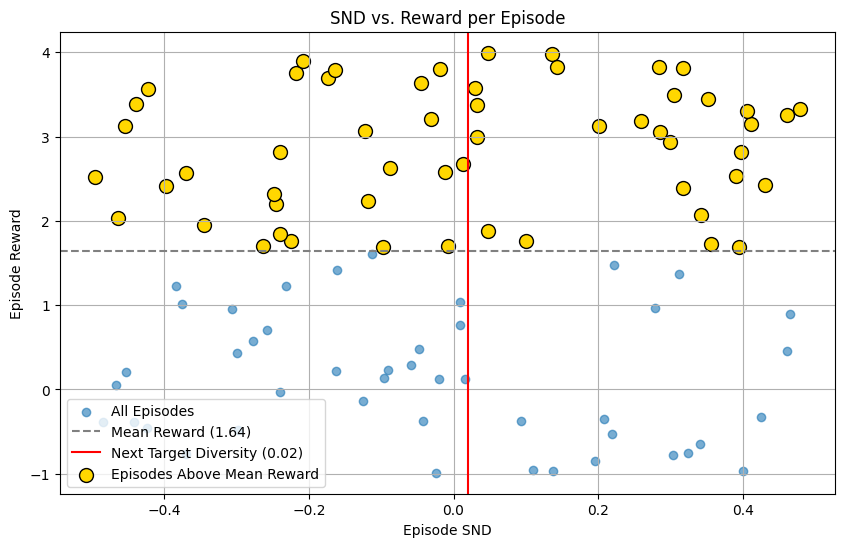

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

# --- Helper Functions ---
def correlation_score_f(x, y):
    """Calculates the correlation score between x and y."""
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)
    sum_y_squared = np.sum(y**2)

    numerator = n * sum_xy - sum_x * sum_y
    denominator_term_x = n * sum_x_squared - sum_x**2
    denominator_term_y = n * sum_y_squared - sum_y**2
    
    denominator = np.sqrt(denominator_term_x * denominator_term_y)

    if denominator == 0:
        return 0.0
    return numerator / denominator

def calculate_cohesion(x, y, center):
    """Calculates the average distance of points from a center."""
    points = np.column_stack((x, y))
    distances = [euclidean(point, center) for point in points]
    return np.mean(distances)

def find_centroid(x, y):
    """Finds the centroid of a set of points."""
    points = np.column_stack((x, y))
    kmeans = KMeans(n_clusters=1, random_state=0, n_init='auto')
    kmeans.fit(points)
    return kmeans.cluster_centers_[0]

def normalize_data(data):
    """Normalizes the data to a range of [0, 1]."""
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val) if max_val > min_val else data * 0.0

# --- Main Logic ---
# Generate random x and y values for demonstration
x = np.random.uniform(low=-0.5, high=0.5, size=100)
y = np.random.uniform(low=-1, high=4, size=100)

# Calculate initial metrics
mean_x = np.mean(x)
mean_y = np.mean(y)
initial_correlation_score = correlation_score_f(x, y)
initial_cohesion = calculate_cohesion(x, y, find_centroid(x, y))

# --- Find the next target diversity ---
# 1. Filter points with reward (y) > mean reward (mean_y)
filtered_x = x[y > mean_y]
filtered_y = y[y > mean_y]

# 2. Check if there are points to form a cluster
if len(filtered_x) > 0:
    # 3. Find the centroid of the filtered points
    filtered_centroid = find_centroid(filtered_x, filtered_y)
    next_target_diversity = filtered_centroid[0]
    
    # 4. Calculate cohesion for the filtered cluster
    filtered_cohesion = calculate_cohesion(filtered_x, filtered_y, filtered_centroid)
    
    # 5. Calculate a combined performance score
    w1 = 1.0  # Weight for average reward (higher is better)
    w2 = 0.5  # Weight for cohesion (lower is better)
    performance_score = w1 * np.mean(filtered_y) - w2 * filtered_cohesion
else:
    # Fallback if no points are above the mean
    next_target_diversity = mean_x
    performance_score = 0.0
    filtered_cohesion = 0.0

# --- Print Results ---
print("Initial Metrics:")
print(f"Mean SND: {mean_x:.2f}")
print(f"Mean Reward: {mean_y:.2f}")
print(f"Correlation Score: {initial_correlation_score:.2f}")
print(f"Initial Cohesion: {initial_cohesion:.2f}")
print("\nTarget Metrics:")
print(f"New Target Diversity (SND): {next_target_diversity:.2f}")
print(f"Filtered Cluster Cohesion: {filtered_cohesion:.2f}")
print(f"Combined Performance Score: {performance_score:.2f}")

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='All Episodes')
plt.axhline(y=mean_y, color='gray', linestyle='--', label=f'Mean Reward ({mean_y:.2f})')
plt.axvline(x=next_target_diversity, color='red', linestyle='-', label=f'Next Target Diversity ({next_target_diversity:.2f})')
plt.scatter(filtered_x, filtered_y, color='gold', edgecolor='black', s=100, label='Episodes Above Mean Reward')
plt.title('SND vs. Reward per Episode')
plt.xlabel('Episode SND')
plt.ylabel('Episode Reward')
plt.legend()
plt.grid(True)
plt.show()

Initial Metrics:
Mean SND: 0.02
Mean Reward: 1.52
Correlation Score: -0.00
Initial Cohesion: 1.25

Target Metrics:
New Target Diversity (SND): 0.03
Filtered Cluster Cohesion: 0.64
Performance Score (Normalized): 4.690692279041287e-16


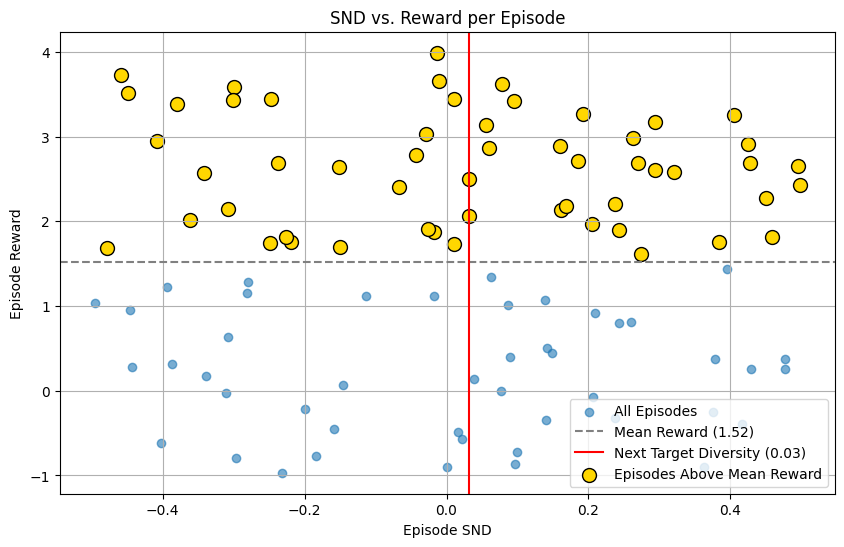

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

# --- Helper Functions ---
def correlation_score_f(x, y):
    """Calculates the correlation score between x and y."""
    n = len(x)
    if n <= 1:
        return 0.0
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)
    sum_y_squared = np.sum(y**2)

    numerator = n * sum_xy - sum_x * sum_y
    denominator_term_x = n * sum_x_squared - sum_x**2
    denominator_term_y = n * sum_y_squared - sum_y**2
    
    denominator = np.sqrt(denominator_term_x * denominator_term_y)

    if denominator == 0:
        return 0.0
    return numerator / denominator

def z_score_normalize(data):
    """Normalizes a list or array of data using the Z-score method."""
    mean_val = np.mean(data)
    std_val = np.std(data)
    if std_val == 0:
        return np.zeros_like(data)
    normalized_data = (data - mean_val) / std_val
    return normalized_data

def calculate_cohesion(x, y, center):
    """Calculates the average distance of points from a center."""
    points = np.column_stack((x, y))
    distances = np.array([euclidean(point, center) for point in points])
    return distances

def find_centroid(x, y):
    """Finds the centroid of a set of points."""
    points = np.column_stack((x, y))
    if len(points) == 0:
        return np.array([np.nan, np.nan])
    kmeans = KMeans(n_clusters=1, random_state=0, n_init='auto')
    kmeans.fit(points)
    return kmeans.cluster_centers_[0]

# --- Main Logic ---
# Generate random x and y values for demonstration
x = np.random.uniform(low=-0.5, high=0.5, size=100)
y = np.random.uniform(low=-1, high=4, size=100)

# Calculate initial metrics
mean_x = np.mean(x)
mean_y = np.mean(y)
initial_correlation_score = correlation_score_f(x, y)
distances = [calculate_cohesion(x, y, find_centroid(x, y))]
initial_cohesion = np.mean(distances)
# --- Find the next target diversity ---
filtered_x = x[y > mean_y]
filtered_y = y[y > mean_y]

# 2. Check if there are points to form a cluster
if len(filtered_x) > 1: # Require at least 2 points for a meaningful cluster
    # 3. Find the centroid of the filtered points
    filtered_centroid = find_centroid(filtered_x, filtered_y)
    next_target_diversity = filtered_centroid[0]
    
    # 4. Calculate cohesion (distances) for the filtered cluster
    filtered_distances = calculate_cohesion(filtered_x, filtered_y, filtered_centroid)
    
    # 5. Normalize reward and cohesion values using Z-score
    normalized_reward = z_score_normalize(y)
    normalized_cohesion_distances = z_score_normalize(distances)
    
    # 6. Calculate a combined performance score using the normalized values
    w1 = 1.0  # Weight for average reward (higher is better)
    w2 = 0.5  # Weight for cohesion (lower is better)
    performance_score = w1 * np.mean(normalized_reward) - w2 * np.mean(normalized_cohesion_distances)
    
    # For printing purposes
    filtered_cohesion = np.mean(filtered_distances)

# --- Print Results ---
print("Initial Metrics:")
print(f"Mean SND: {mean_x:.2f}")
print(f"Mean Reward: {mean_y:.2f}")
print(f"Correlation Score: {initial_correlation_score:.2f}")
print(f"Initial Cohesion: {initial_cohesion:.2f}")
print("\nTarget Metrics:")
print(f"New Target Diversity (SND): {next_target_diversity:.2f}")
print(f"Filtered Cluster Cohesion: {filtered_cohesion:.2f}")
print(f"Performance Score (Normalized): {performance_score}")

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='All Episodes')
plt.axhline(y=mean_y, color='gray', linestyle='--', label=f'Mean Reward ({mean_y:.2f})')
plt.axvline(x=next_target_diversity, color='red', linestyle='-', label=f'Next Target Diversity ({next_target_diversity:.2f})')
plt.scatter(filtered_x, filtered_y, color='gold', edgecolor='black', s=100, label='Episodes Above Mean Reward')
plt.title('SND vs. Reward per Episode')
plt.xlabel('Episode SND')
plt.ylabel('Episode Reward')
plt.legend()
plt.grid(True)
plt.show()

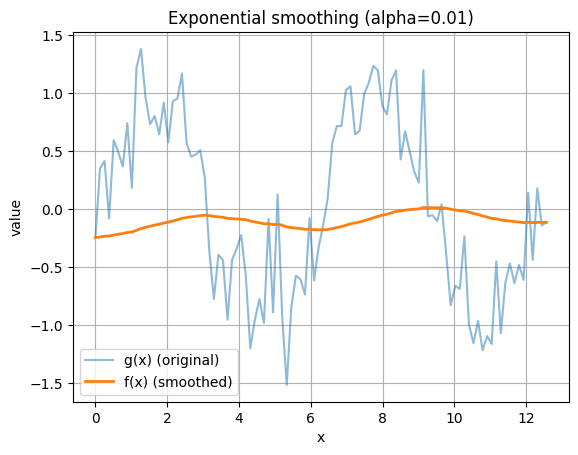

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.01
n_points = 100

# Input signal g(x): sine wave with noise
x = np.linspace(0, 4*np.pi, n_points)
g = np.sin(x) + 0.3*np.random.randn(n_points)
# g = np.sin(x)
# Initialize f
f = np.zeros(n_points)
f[0] = g[0]  # start with g(0)

# Recursive smoothing
for t in range(1, n_points):
    f[t] = alpha*g[t] + (1-alpha)*f[t-1]

# Plot
plt.plot(x, g, label="g(x) (original)", alpha=0.5)
plt.plot(x, f, label="f(x) (smoothed)", linewidth=2)
plt.xlabel("x")
plt.ylabel("value")
plt.title(f"Exponential smoothing (alpha={alpha})")
plt.legend()
plt.grid(True)
plt.show()
